## Data Import and Matrix Split

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Intersection_Y1R1R2_0702Y1_0702.csv')
Y1 = df.loc[:, 'UniqueID':'t39_combo']

In [3]:
df = pd.read_csv('Intersection_Y1R1R2_0702R1_0702.csv')
R1 = df.loc[:, 'UniqueID':'t39_combo']

In [4]:
df = pd.read_csv('Intersection_Y1R1R2_0702R2_0702.csv')
R2 = df.loc[:, 'UniqueID':'t39_combo']

In [5]:
#indices
columns = Y1.columns.tolist()

#create list of indices that have NaN values in their rows
index_list=[]
for col in columns:   
    index_list.extend(Y1[Y1[col].isnull()].index.tolist())
index_list

#make this list unique
my_set = set(index_list)
unique_index_list = list(my_set)
unique_index_list

[]

In [6]:
#indices
columns = R1.columns.tolist()

#create list of indices that have NaN values in their rows
index_list=[]
for col in columns:   
    index_list.extend(R1[R1[col].isnull()].index.tolist())
index_list

#make this list unique
my_set = set(index_list)
unique_index_list1 = list(my_set)
unique_index_list1

[512, 770, 169, 624, 402, 56, 1087, 927]

In [7]:
#indices
columns = R2.columns.tolist()

#create list of indices that have NaN values in their rows
index_list=[]
for col in columns:   
    index_list.extend(R2[R2[col].isnull()].index.tolist())
index_list

#make this list unique
my_set = set(index_list)
unique_index_list2 = list(my_set)
unique_index_list2

[1297, 182, 347, 446, 763]

In [8]:
#make list of UniqueIDs associated with these NaN values
ID_list = []
for i in unique_index_list1:
    ID_list.append(R1.loc[i,'UniqueID'])
ID_list

[14334.0, 17710.0, 11189.0, 16486.0, 12668.0, 4960.0, 25920.0, 22418.0]

In [9]:
#make list of UniqueIDs associated with these NaN values
for i in unique_index_list2:
    ID_list.append(R2.loc[i,'UniqueID'])
ID_list

[14334.0,
 17710.0,
 11189.0,
 16486.0,
 12668.0,
 4960.0,
 25920.0,
 22418.0,
 32402.0,
 11205.0,
 12560.0,
 13876.0,
 17696.0]

In [10]:
#drop these IDs from the data
for id in ID_list:
    Y1 =Y1[Y1['UniqueID']!=id]

In [11]:
#drop these IDs from the data
for id in ID_list:
    R1 =R1[R1['UniqueID']!=id]

In [12]:
#drop these IDs from the data
for id in ID_list:
    R2 =R2[R2['UniqueID']!=id]

In [13]:
Y1 = Y1.drop('UniqueID', axis=1)
Y1=Y1.transpose()
Y1.shape

(39, 1663)

In [14]:
R1 = R1.drop('UniqueID', axis=1)
R1=R1.transpose()
R1.shape

(39, 1663)

In [15]:
R2 = R2.drop('UniqueID', axis=1)
R2=R2.transpose()
R2.shape

(39, 1663)

## DMD

In [16]:
U_Y1,Sig_Y1,V_Y1=np.linalg.svd(Y1, full_matrices=False)    
U_Y1_T=U_Y1.conjugate().transpose()
V_Y1_T=V_Y1.conjugate().transpose()
Sig_inv_Y1=np.zeros((39, 39))
for i in range(39):
    for j in range(39):
        if i==j:
            Sig_inv_Y1[i][j]=1/Sig_Y1[i]


In [17]:
U_R1,Sig_R1,V_R1=np.linalg.svd(R1, full_matrices=False)
U_R1_T=U_R1.conjugate().transpose()
V_R1_T=V_R1.conjugate().transpose()
Sig_inv_R1=np.zeros((39, 39))
for i in range(39):
    for j in range(39):
        if i==j:
            Sig_inv_R1[i][j]=1/Sig_R1[i]

In [18]:
A_step1=np.dot(R1,V_Y1_T)
A_step2=np.dot(A_step1,Sig_inv_Y1)
A_Y1_R1=np.dot(A_step2,U_Y1_T)
A_Y1_R1

array([[ 0.21565542,  0.02062487, -0.00449812, ..., -0.02126487,
         0.03653697, -0.01386073],
       [-0.00947459,  0.33321386,  0.0900671 , ...,  0.03302122,
         0.02726913, -0.05141104],
       [ 0.01730407,  0.00539746,  0.20205631, ..., -0.02800372,
         0.04396666, -0.03078666],
       ...,
       [-0.0188378 ,  0.04857146,  0.03559963, ...,  0.26850137,
         0.06551791,  0.0223492 ],
       [-0.02191468, -0.00278714,  0.04007333, ...,  0.08742977,
         0.32986472,  0.05493298],
       [-0.04571395, -0.01786115,  0.00417156, ...,  0.07447326,
         0.05102718,  0.47823758]])

In [19]:
A_step1=np.dot(R2,V_R1_T)
A_step2=np.dot(A_step1,Sig_inv_R1)
A_R1_R2=np.dot(A_step2,U_R1_T)
A_R1_R2

array([[ 0.2139915 ,  0.12570737,  0.06574258, ...,  0.10617056,
         0.00417705,  0.01309994],
       [-0.04086313,  0.38712517,  0.15623323, ...,  0.16934001,
        -0.00530106,  0.03022366],
       [-0.00545958,  0.11583922,  0.2763884 , ...,  0.0932354 ,
         0.00887889,  0.00942768],
       ...,
       [ 0.0136019 ,  0.0543668 ,  0.01348655, ...,  0.34149469,
         0.02634699,  0.02077272],
       [-0.01538042,  0.01153239, -0.06649929, ...,  0.17515214,
         0.3126853 ,  0.0418364 ],
       [-0.04156327,  0.00550518, -0.04236509, ...,  0.15530926,
         0.01903196,  0.51695359]])

In [20]:
from sys import maxsize
from numpy import set_printoptions

set_printoptions(threshold=maxsize)
print(A_Y1_R1)

[[ 2.15655417e-01  2.06248728e-02 -4.49811969e-03 -2.36082397e-02
   1.81436459e-02  6.31895962e-03 -1.41308788e-02  1.72514834e-02
  -1.41965055e-02 -5.93507227e-02  2.13750101e-02  8.45180215e-03
  -3.29861956e-02  8.63431767e-02  7.17572928e-02 -4.08924821e-03
   8.88079296e-02  8.28057560e-03  4.85180829e-02  1.33274800e-01
   2.98824047e-02  2.17502234e-02 -1.53685245e-02 -2.71690172e-02
   4.63992487e-02  3.86919911e-02  2.66764271e-02  1.52125284e-02
  -4.86074474e-02  4.45351679e-02  1.49376220e-02  6.80536210e-02
   2.32896121e-04  1.33009481e-02 -1.42244598e-02 -5.77638743e-02
  -2.12648740e-02  3.65369715e-02 -1.38607301e-02]
 [-9.47459405e-03  3.33213860e-01  9.00670967e-02 -5.73916210e-02
  -3.25034566e-02 -7.08874032e-03 -7.31112594e-02  5.50546808e-02
   5.65788744e-03  3.41682984e-02  4.62000404e-03 -2.15165853e-02
  -1.14666754e-02  2.43878304e-01  1.95071833e-02  1.08624347e-01
   3.68536769e-02  6.52213882e-02  6.28738823e-02  1.12388678e-01
   4.13146797e-02  6.0541

In [21]:
print(A_R1_R2)

[[ 2.13991497e-01  1.25707370e-01  6.57425829e-02 -7.20886589e-03
   9.61630078e-03 -4.40850254e-02  1.58026343e-02 -4.20357839e-02
  -4.37472162e-02  7.50565053e-02  1.51173023e-01 -9.71649803e-02
   3.86533408e-02 -4.98862688e-02 -8.95487154e-03  9.21582783e-03
  -1.23068587e-02  3.98684226e-03  4.54804260e-02  5.29170677e-02
   8.58903309e-03 -2.28914573e-02  8.32074192e-02  6.41098704e-03
   6.47632033e-02  1.83734778e-02  2.70405522e-02  1.49160493e-02
   1.61013567e-02 -6.15088763e-03 -4.87043004e-03 -3.59216660e-02
   1.71420695e-02  3.36118178e-02  5.14955764e-03  3.27522146e-02
   1.06170555e-01  4.17705368e-03  1.30999448e-02]
 [-4.08631333e-02  3.87125169e-01  1.56233230e-01 -1.25671585e-02
   1.25599599e-02 -3.73617657e-02 -5.50070790e-02 -6.05189693e-02
   3.42375278e-04  3.49872491e-02  4.92650267e-02 -7.04991531e-02
   3.26486707e-02 -1.79077821e-03  5.17299751e-02  1.08109362e-01
   1.54905228e-02  3.60359318e-02  1.98645886e-02  7.71088155e-02
  -1.14925407e-02  4.1707

In [22]:
Sig_Y1

array([709.20955501,  82.39543779,  76.49212679,  67.85792621,
        62.98507758,  59.36134866,  55.02374265,  52.09414874,
        48.11929764,  42.17411206,  41.5022775 ,  40.32256133,
        39.53747013,  38.77602222,  38.40650929,  37.04404066,
        36.63925812,  35.86187221,  35.24033283,  34.01336053,
        33.10795446,  31.96351054,  31.0901912 ,  30.49986116,
        29.62696394,  29.34174253,  28.78712008,  26.44955079,
        25.77050422,  25.15993337,  24.66276827,  24.36248224,
        23.66195068,  20.96662943,  19.66080471,  17.43767644,
        16.98093211,  16.20457031,  13.86665065])

In [23]:
x,y=np.linalg.eig(A_Y1_R1)

In [24]:
m,n=np.linalg.eig(A_R1_R2)

In [25]:
eiglog=np.log(x)

In [26]:
eiglog2=np.log(m)

In [27]:
lamphi=np.zeros(39)

In [28]:
for i in range (39):
    rep=y[i]
    norm=np.linalg.norm(rep)
    val=np.absolute(x[i])*norm
    lamphi[i]=val
lamphi
    

array([0.90545856, 0.47011361, 0.39314632, 0.3398548 , 0.37791815,
       0.41191962, 0.27954416, 0.40440698, 0.29709131, 0.13742667,
       0.10404949, 0.11414972, 0.10321927, 0.08552754, 0.0699539 ,
       0.03413248, 0.05847223, 0.14232236, 0.14123483, 0.09556784,
       0.10204529, 0.03199756, 0.04414747, 0.26675416, 0.22942678,
       0.1049138 , 0.13997557, 0.36647989, 0.11059519, 0.27170197,
       0.28850313, 0.18950702, 0.21664234, 0.17031319, 0.22959303,
       0.16946419, 0.14443391, 0.10072797, 0.11655288])

In [29]:
lamphi2=np.zeros(39)

In [30]:
for i in range (39):
    rep=n[i]
    norm=np.linalg.norm(rep)
    val=np.absolute(m[i])*norm
    lamphi2[i]=val
lamphi2
    

array([0.86734549, 0.56757343, 0.4527385 , 0.37202074, 0.41125087,
       0.3120726 , 0.04450949, 0.04308556, 0.0097372 , 0.00774664,
       0.08143087, 0.06411746, 0.13008388, 0.11115494, 0.18886392,
       0.17640891, 0.25928945, 0.23861823, 0.2176814 , 0.30803333,
       0.5592854 , 0.37827044, 0.09458272, 0.09102402, 0.24296519,
       0.24976457, 0.31418357, 0.23091627, 0.33846017, 0.19675389,
       0.20937618, 0.21160925, 0.17009261, 0.0358239 , 0.08869359,
       0.10613502, 0.05856696, 0.12985579, 0.139511  ])

In [31]:
## Predictions 

predictions = np.dot(A_Y1_R1,Y1)
mse = mean_squared_error(R1, predictions)
mse

0.9722469609695259

## Graphs

In [32]:
label=['a1', 'a2',
       'a3', 'a4', 'a5', 'a6', 'b7', 'b8',
       'b9', 'c10', 'c11', 'c12', 'c13',
       'c14', 'c15', 'c16', 'de17', 'de18',
       'de19', 'de20', 'f21', 'f22', 'f23o',
       'f24', 'f25', 'f26', 'g27', 'g28',
       'g29', 'g30', 'g31', 'h32', 'h33',
       'h34', 'h35', 'h36', 'h37', 't38',
       't39']

### Y1 to R1

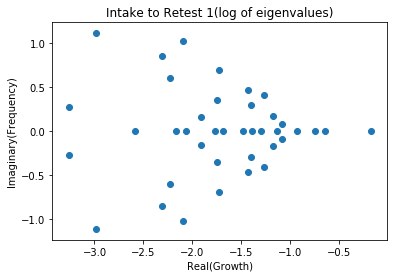

In [33]:
plt.scatter(eiglog.real,eiglog.imag)
plt.title('Intake to Retest 1(log of eigenvalues)') 
plt.xlabel('Real(Growth)')
plt.ylabel('Imaginary(Frequency)')
plt.show()

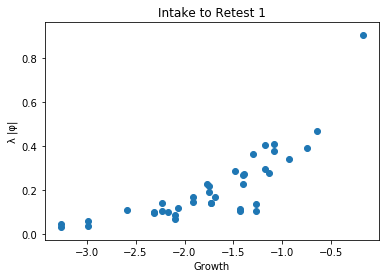

In [34]:
plt.scatter(eiglog.real,lamphi)
plt.title('Intake to Retest 1') 
plt.xlabel('Growth')
plt.ylabel(u'\u03BB' ' |' u'\u03C6''|')
plt.show()
plt.show()

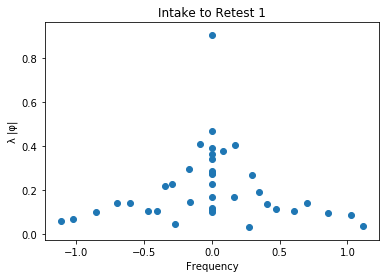

In [35]:
plt.scatter(eiglog.imag,lamphi)
plt.title('Intake to Retest 1') 
plt.xlabel('Frequency')
plt.ylabel(u'\u03BB' ' |' u'\u03C6''|')
plt.show()
plt.show()

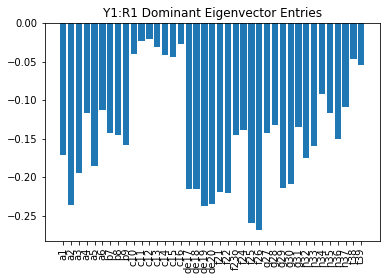

In [36]:
index=np.zeros(39)
weiabs=np.zeros(39)
for i in range (39):
    index[i]=i
for j in range (39):
    weiabs[j]=y[j,0].real
plt.title('Y1:R1 Dominant Eigenvector Entries') 
plt.xticks(np.arange(min(index), max(index)+1, 1.0), label, rotation='vertical')
plt.bar(index,weiabs)
plt.show()

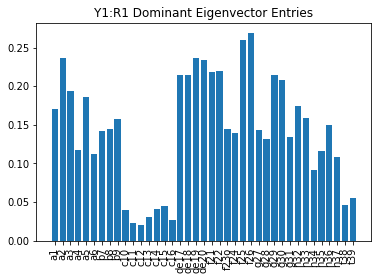

In [37]:
index=np.zeros(39)
weiabs=np.zeros(39)
for i in range (39):
    index[i]=i
for j in range (39):
    weiabs[j]=y[j,0].real
plt.title('Y1:R1 Dominant Eigenvector Entries') 
plt.xticks(np.arange(min(index), max(index)+1, 1.0), label, rotation='vertical')
plt.bar(index,abs(weiabs))
plt.show()

### R1 to R2

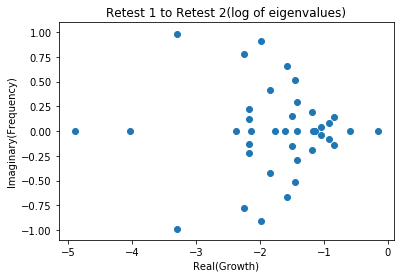

In [38]:
plt.scatter(eiglog2.real,eiglog2.imag)
plt.title('Retest 1 to Retest 2(log of eigenvalues)') 
plt.xlabel('Real(Growth)')
plt.ylabel('Imaginary(Frequency)')
plt.show()
plt.show()

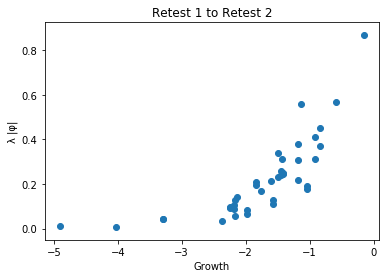

In [39]:
plt.scatter(eiglog2.real,lamphi2)
plt.title('Retest 1 to Retest 2') 
plt.xlabel('Growth')
plt.ylabel(u'\u03BB' ' |' u'\u03C6''|')
plt.show()

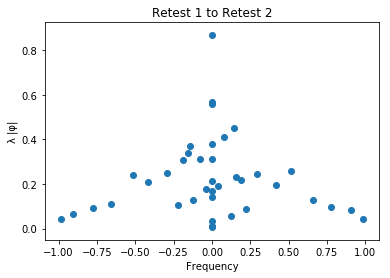

In [40]:
plt.scatter(eiglog2.imag,lamphi2)
plt.title('Retest 1 to Retest 2') 
plt.xlabel('Frequency')
plt.ylabel(u'\u03BB' ' |' u'\u03C6''|')
plt.show()

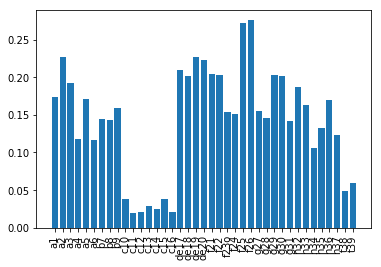

In [41]:
weiabs2=np.zeros(39)
for j in range (39):
    weiabs2[j]=n[j,0].real
plt.bar(index,weiabs2)
plt.xticks(np.arange(min(index), max(index)+1, 1.0), label, rotation='vertical')
plt.show()

<BarContainer object of 39 artists>

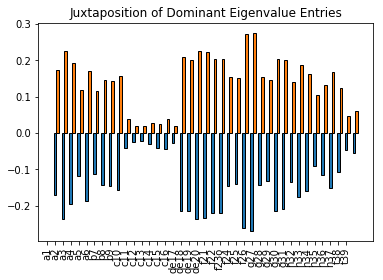

In [42]:
year = ['Y1 to R1','R1 to R2']
pos = pos = np.arange(len(index))
bar_width = 0.35
plt.title('Juxtaposition of Dominant Eigenvalue Entries') 
plt.xticks(np.arange(min(index) - 1, max(index), 1.0), label, rotation='vertical')
plt.bar(pos,weiabs,bar_width,edgecolor='black')
plt.bar(pos+bar_width,weiabs2,bar_width,edgecolor='black')

<BarContainer object of 39 artists>

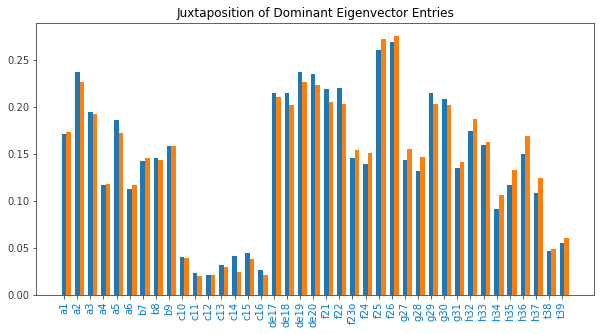

In [43]:
year = ['Y1 to R1','R1 to R2']
pos = pos = np.arange(len(index))
bar_width = 0.35
plt.figure(figsize=(10,5))
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.title('Juxtaposition of Dominant Eigenvector Entries') 
plt.xticks(np.arange(min(index), max(index)+1, 1.0),label, color='#007acc',rotation='vertical')
plt.bar(pos,abs(weiabs),bar_width)
plt.bar(pos+bar_width,abs(weiabs2),bar_width)